# Development rig

In [1]:
import sys

# setting path
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np

from waterwaves1.wave import wave1
from waterwaves1.packing import unpack1,pack1
from waterwaves1.fourier import IEj

In [2]:
L_d=16
Hmx_d=(0.141063*L_d+0.0095721*L_d**2+0.0077829*L_d**3)/(1+0.0788340*L_d+0.0317567*L_d**2+0.0093407*L_d**3)
d=2*np.pi/L_d
N,s=30,d*(1+0.0*Hmx_d)
X=np.linspace(0,np.pi,200)

0.8 fail


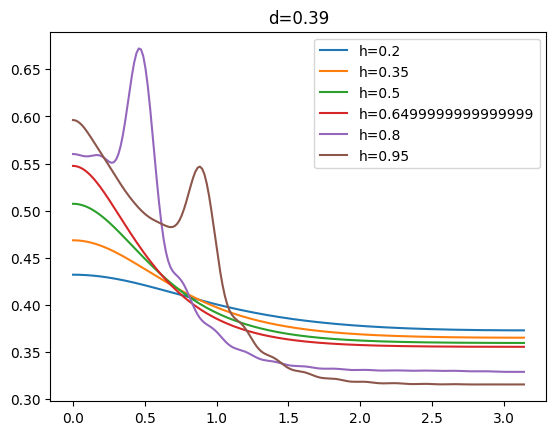

In [3]:
def eta(h,sol):
    Ej,Q,R=unpack1(sol.x)
    if not sol.success:
        print(h,'fail')
    plt.plot(X,IEj([d,*Ej],X),label=f"h={h}")

def eta1(h):
    eta(h,wave1(N,h*Hmx_d*d,d=d,scaler=s))
    
for h in np.linspace(0.2,0.95,6):
    eta1(h)
plt.legend()
plt.title(f'd={d:4.2f}')
plt.show()

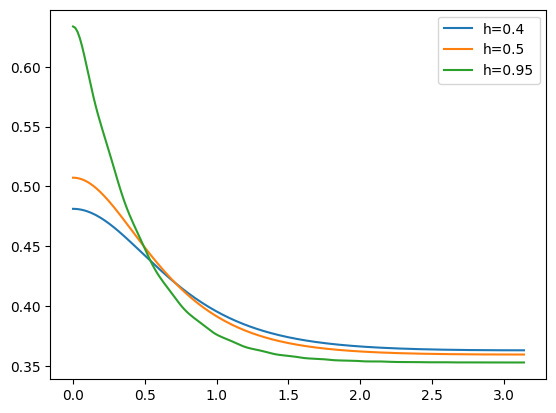

In [4]:
def step(h1,h2,h3):
    sol1=wave1(N,h1*Hmx_d*d,d=d,scaler=s)
    sol2=wave1(N,h2*Hmx_d*d,d=d,scaler=s)
    Ej1,Q1,R1=unpack1(sol1.x)
    Ej2,Q2,R2=unpack1(sol2.x)
    A3=((h2-h3)*sol1.x+(h3-h1)*sol2.x)/(h2-h1)
    sol3=wave1(N,h3*Hmx_d*d,d=d,scaler=s,A0=A3)
    if not sol3.success:
        print(h3,'fail step 2')    
    return sol3

def eta2(h1,h2,h3):
    eta(h3,step(h1,h2,h3))
eta1(0.4)
eta1(0.5)
eta2(0.4,0.5,0.95)
plt.legend()
plt.show()

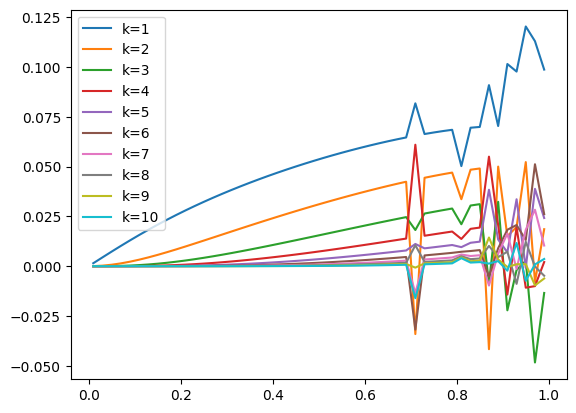

In [5]:
def E(H,k):
    SOL=[wave1(N,h*Hmx_d*d,d=d,scaler=s) for h in H]
    Ek=[sol.x[k-1] for sol in SOL]
    plt.plot(H,Ek,label=f'k={k}')

for k in range(1,11):
    E(np.linspace(0.01,0.99),k)
plt.legend()
plt.show()

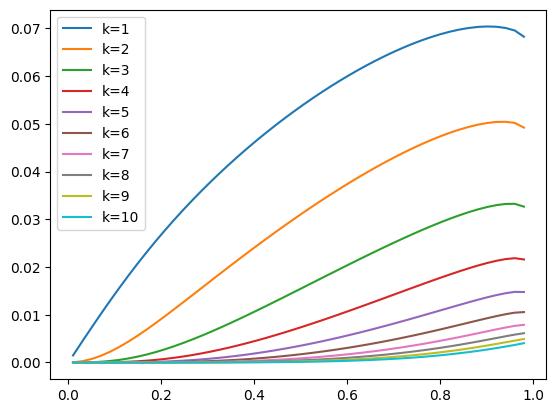

In [8]:
def E2(H,k):
    SOL=[step(0.5,0.6,h) for h in H]
    for n in range(len(SOL)):
        if not SOL[n].success:
            print(H[n])
    Ek=[sol.x[k-1] for sol in SOL]
    plt.plot(H,Ek,label=f'k={k}')

for k in range(1,11):
    E2(np.linspace(0.01,0.98),k)
plt.legend()
plt.show()